# Regression with Non-Stationary Data. Cointegration

## Simulating Time series data stationary and nonstationary

In [1]:
# Standard librariees
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame

#Statistics
from scipy import stats

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
# Libraries for time series analysis
import os
import sys


import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as smtools
import scipy.stats as scs
from arch import arch_model

Consider special case of AR(1) model with $\rho=1$

\begin{equation*}
y_t=y_{t-1} + \sigma_t
\end{equation*}

This model is know as random walk model. Below we run a few simulations to demonstrate that this type of time series are non-stationary

In [175]:
#We start by defining the parameters for the random shock variable. 
#We assume that on average it is zero and its variance is constant.

In [4]:
days = 500
mu = 0
sigma = 1.5
rho=1

In [5]:
def simulation(start_point,days,mu,sigma):
    
    variable = np.zeros(days)
    variable[0]=start_point
    
    shock = np.zeros(days)
        
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu,scale=sigma)
        
             
        variable[x]=rho*variable[x-1] + shock[x]
        
    return variable

In [6]:
start_point = 0.5

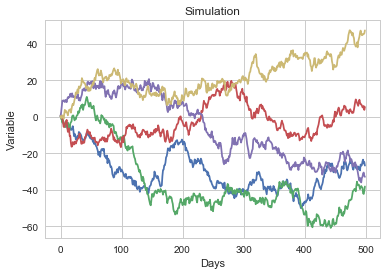

In [7]:
for run in range(5):
    plt.plot(simulation(start_point,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Variable')
plt.title('Simulation')

Now we look at random walk models with drift

\begin{equation*}
y_t=\alpha + y_{t-1} + \sigma_t
\end{equation*}

Where $\alpha$ provides a deterministic trend to the series as follows (applying recursive substitution):

\begin{equation*}
y_1=\alpha + y_{0} + \sigma_1
\end{equation*}

\begin{equation*}
y_2=\alpha + y_{1} + \sigma_2 = \alpha + (\alpha + y_{0} + \sigma_1)  + \sigma_2
\end{equation*}

\begin{equation*}
y_t=\alpha + y_{t-1} + \sigma_t = t*\alpha + y_{0} + \sum_{s=1}^t {\sigma_s}
\end{equation*}


Assignment: What will be the expectation and variance of $y_t$?

In [8]:
#Run another simulation
days = 500
alpha = 0.2
mu = 0
sigma = 1.5
rho=1

def simulation(start_point,days,mu,sigma):
    
    variable = np.zeros(days)
    variable[0]=start_point
    
    shock = np.zeros(days)
        
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu,scale=sigma)
        
             
        variable[x]=alpha + rho*variable[x-1] + shock[x]
        
    return variable

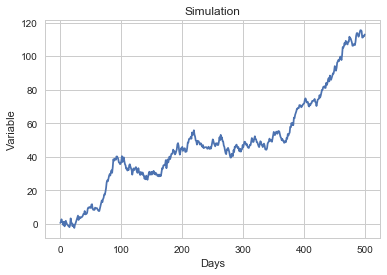

In [9]:
start_point = 0.5
for run in range(1):
    plt.plot(simulation(start_point,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Variable')
plt.title('Simulation')

Finally, we can extend the random walk model even further by adding a time trend:

\begin{equation*}
y_t=\alpha+ \delta t + y_{t-1} + \sigma_t
\end{equation*}

In [10]:
#Run another simulation:
days = 500
alpha = 0.1
mu = 0
sigma = 1.5
rho=1
delta = 0.001

def simulation(start_point,days,mu,sigma):
    
    variable = np.zeros(days)
    variable[0]=start_point
    
    shock = np.zeros(days)
        
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu,scale=sigma)
        
             
        variable[x]=alpha + delta*days + rho*variable[x-1] + shock[x]
        
    return variable

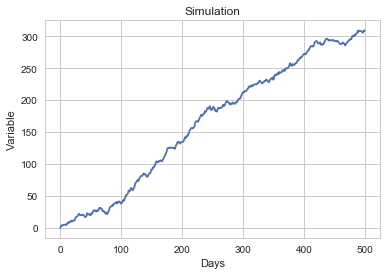

In [11]:
start_point = 0
for run in range(1):
    plt.plot(simulation(start_point,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Variable')
plt.title('Simulation')

To recap, we have considered the autoregressive class of models and have shown that
they display properties of stationarity when $\rho<1$. We have also discussed the randomwalk
class of models when $\rho = 1$. We showed that random walk models display properties of
nonstationarity.


## Spurious Regression

Why it is wrong to run regression (OLS) on time series data without checking stationarity of data? Consider the following to absolutely unrelated processes and the result of the regression model

eq1:
\begin{equation*}
y_t = y_{t-1}+v_t
\end{equation*}

and:
    
eq2:
\begin{equation*}
x_t = x_{t-1}+u_t
\end{equation*}    

Where $v$ and $u$ are independent $N(0,1) random errors

In [12]:
#Simulate the respective series and run the regression

In [13]:
#Run 1st simulation to get y simulation:
days = 700
mu = 0
sigma = 1


def simulation(start_point,days,mu,sigma):
    
    variable1 = np.zeros(days)
    variable1[0]=start_point
    
    shock = np.zeros(days)
    y = [] 
        
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu,scale=sigma)
        
             
        variable1[x]=variable1[x-1] + shock[x]
        y.append(variable1)
    return variable1

In [14]:
y = pd.Series(simulation(start_point,days,mu,sigma))

In [15]:
#Run 2nd simulation to get x simulation:
days = 700
mu = 0
sigma = 1


def simulation(start_point,days,mu,sigma):
    
    variable1 = np.zeros(days)
    variable1[0]=start_point
    
    shock = np.zeros(days)
    y = [] 
        
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu,scale=sigma)
        
             
        variable1[x]=variable1[x-1] + shock[x]
        y.append(variable1)
    return variable1

In [16]:
x = pd.Series(simulation(start_point,days,mu,sigma))

In [17]:
x.head()

0    0.000000
1    0.372048
2   -1.400619
3   -1.438284
4   -2.098825
dtype: float64

In [18]:
# Import the linear regression from statsmodels
import statsmodels.api as sm

In [19]:
# Prepare target and input variables. 
X_multi=x
Y_target=y
# Add the costant to our input variables
X_multi=sm.tools.tools.add_constant(X_multi, prepend=True, has_constant='skip')

In [20]:
# OLS Regression
mod = sm.OLS(Y_target, X_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.092
Date:                Tue, 10 Apr 2018   Prob (F-statistic):             0.0435
Time:                        21:48:30   Log-Likelihood:                -2217.3
No. Observations:                 700   AIC:                             4439.
Df Residuals:                     698   BIC:                             4448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0464      0.464     15.190      0.0

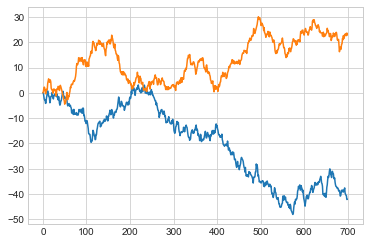

In [193]:
plt.plot(x) # plotting t, a separately 
plt.plot(y) # plotting t, b separately 
plt.show()

## Dickey-Fuller Test for Stationarity

Sources for this section: Hill et a. "Principles of Econometrics" pp 484-488 and 
https://machinelearningmastery.com/time-series-data-stationary-python/

   

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. It uses an autoregressive model and optimizes an information criterion across multiple different lag values. Consider again AR(1) model:

\begin{equation*}
y_t=\rho y_{t-1} + v_t
\end{equation*}

where $v_t$ is are independent random errros with zero mean and constant variance $\sigma_v^2$. We
can test for nonstationarity by testing the null hypothesis that $\rho \geq 1$ against the alternative
that $\rvert \rho \lvert < 1$, or simply $\rho< 1$. This one-sided (left tail) test is put into a more convenient form
by subtracting $y_{t-1}$ from both sides of the equation above to obtain:

\begin{equation*}
y_t - y_{t-1}=\rho y_{t-1} - y_{t-1} + v_t
\end{equation*}

\begin{equation*}
\Delta y_t = \gamma y_{t-1} + v_t
\end{equation*}

where $\gamma = \rho - 1 $, Then the hypothesis can be written in terms of either $\rho$ or $\gamma$

\begin{equation*}
H_0: \rho = 1 \leftrightarrow H_0: \gamma = 0
\end{equation*} 

\begin{equation*}
H_1: \rho < 1 \leftrightarrow H_1: \gamma < 0
\end{equation*} 

Note that the null hypothesis is that the series is nonstationary. In other words, if we do not
reject the null, we conclude that it is a nonstationary process; if we reject the null hypothesis
that $\gamma=0$, then we conclude that the series is stationary.

In [196]:
#Implement the test for our simulated data
from statsmodels.tsa.stattools import adfuller

In [197]:
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.640627
p-value: 0.461933
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [198]:
#Question: Do you reject the null hypothesis?

## Cointegration

To start with, note that series which can be made stationary by taking first difference are known to be **intgrated of order one** and denoted as **I(1)**

As a general rule, nonstationary time-series variables should not be used in regression
models, to avoid the problem of spurious regression. However, there is an exception to this
rule. If $y_t$ and $x_t$ are nonstationary I(1) variables, then we expect their difference, or any
linear combination of them, such as:

\begin{equation*}
e_t = y_t - \beta_1 - \beta_2 x_t
\end{equation*}
to be I(1) as well

However, there is an important case when $e_t = y_t - \beta_1 - \beta_2 x_t$ is a stationary I(0) process. In this case $y_t$ and $x_t$ are said to be cointegrated. Cointegration implies that $y_t$ and $x_t$ share similar stochastic
trends, and, since the difference $e_t$ is stationary, they never diverge too far from each other.

A natural way to test whether $y_t$ and $x_t$ are cointegrated is to test whether the errors $e_t = y_t - \beta_1 - \beta_2 x_t$ are stationary. Since we cannot observe $e_t$ , we test the stationarity of the least squares residuals, $\hat{e}_t = y_t - \beta_1 - \beta_2 x_t$ using a Dickey–Fuller test. The test for cointegration is effectively a test of the stationarity of the residuals. If the residuals are stationary, then $y_t$ and $x_t$ are said tobecointegrated; if the residuals are nonstationary, then $y_t$ and $x_t$ are not cointegrated, and any apparent regression relationship between them is said to be spurious.

Luckily statsmodels provide built-in test for cointegration: It returns (in order): 1. t-statistic for the test, 2. p-value, 
set of critical values (1%, 5%, 10%) significance. The test can be modified to included time trend in addition to constant, as well as 
lags of dependent variable to get rid of autocorrelation in errors. 

In the following example we test cointegration of I(1) series that we had generated above. 

In [201]:
smtools.coint(x, y, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)

(-2.2967157447812121,
 0.37519274053352741,
 array([-3.91217657, -3.34488517, -3.05052309]))

### What if series are in fact co-integrated

In [202]:
#Load the dataset required for this assignment
df = pd.read_stata('usa.dta')

In [205]:
df.tail()

,gdp,inf,f,b
99,14191.2,1.54,0.51,1.48
100,14049.7,1.65,0.18,1.27
101,14034.5,2.09,0.18,1.49
102,14114.7,2.32,0.16,1.56
103,14277.3,2.59,0.12,1.39


In [204]:
#f is federal funds rate and b is the 3 year bond rate. and we want to test whether these 2 series are cointegrated

In [208]:
#Create data index
ts = pd.period_range('1984Q1', periods=104, freq='Q')
df['Date'] = ts
df.set_index('Date',inplace=True)

In [209]:
df.tail()

,gdp,inf,f,b
Date,,,,
2008Q4,14191.2,1.54,0.51,1.48
2009Q1,14049.7,1.65,0.18,1.27
2009Q2,14034.5,2.09,0.18,1.49
2009Q3,14114.7,2.32,0.16,1.56
2009Q4,14277.3,2.59,0.12,1.39


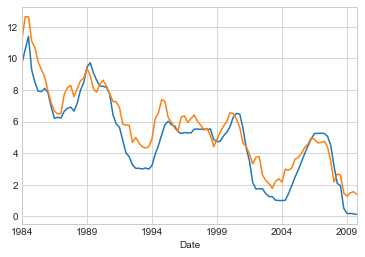

In [227]:
df['f'].plot() 
df['b'].plot() 
plt.show()

In [232]:
smtools.coint(df['f'], df['b'], trend='ct', method='aeg', maxlag=1, autolag='aic', return_results=None)

(-4.6830882752556802,
 0.002917598867967872,
 array([-4.48087338, -3.87404401, -3.56575292]))

In [ ]:
# Question: What changes can you note in the test compared to previous example?

If the series are cointegrated you can estimate long-run relationship between the two variables using OLS

In [233]:
# Prepare target and input variables. 
X_multi=df['f']
Y_target=df['b']
# Add the costant to our input variables
X_multi=sm.tools.tools.add_constant(X_multi, prepend=True, has_constant='skip')

In [234]:
# OLS Regression
mod = sm.OLS(Y_target, X_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      b   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     865.6
Date:                Thu, 29 Mar 2018   Prob (F-statistic):           1.23e-51
Time:                        14:39:36   Log-Likelihood:                -124.67
No. Observations:                 104   AIC:                             253.3
Df Residuals:                     102   BIC:                             258.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1398      0.174      6.548      0.0